# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from api_keys import weather_api_key,geoapify_key

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [69]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-40, 40)
lng_range = (-150, 150)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(city)
print(f"Number of cities in the list: {len(cities)}")

quiindy
Number of cities in the list: 724


---

In [70]:
import pprint
pprint.pprint(cities)

['constitucion',
 "k'olito",
 'adamstown',
 'muisne',
 'lebu',
 'waddan',
 'walvis bay',
 'edinburgh of the seven seas',
 'quepos',
 'caleta de carquin',
 'san andres',
 'bijar',
 'puerto ayora',
 'muntok',
 'grabouw',
 'ciudad insurgentes',
 'sitampiky',
 'mammoth lakes',
 'ribeira grande',
 'massawa',
 'nova sintra',
 'chipinge',
 'touros',
 'port mathurin',
 'laojunmiao',
 'bac lieu',
 'kayangel',
 'taltal',
 'remire-montjoly',
 'west island',
 'sinabang',
 'bandar abbas',
 'guerrero negro',
 'jamestown',
 'mumford',
 'hawaiian paradise park',
 'al khafji',
 'namibe',
 'san antonio de pale',
 'kiffa',
 'ouesso',
 'socorro',
 'nagqu',
 'ha',
 'axim',
 'boquete',
 'cobija',
 'alaghsas',
 'aioun',
 'barclayville',
 'pitiquito',
 'hollister',
 'tomatlan',
 'puerto san carlos',
 'mahibadhoo',
 'yashikira',
 'arraial do cabo',
 'palmas',
 'kaohsiung',
 'dahlonega',
 'callao',
 'jiaojiang',
 'grytviken',
 'madera',
 'salinopolis',
 'tanhacu',
 'sao vicente',
 'minas de marcona',
 'geraldto

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [71]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [72]:
#My Solution Prototype Begins

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=d14ee3f61fc19b1b3793df6059112143&units=metric&q=


In [4]:
cities = [
    "New York", "Los Angeles", "Chicago", "Houston", "Phoenix", "Philadelphia", 
    "San Antonio", "San Diego", "Dallas", "San Jose", "Austin", "Jacksonville", 
    "Fort Worth", "Columbus", "Charlotte", "San Francisco", "Indianapolis", 
    "Seattle", "Denver", "Washington", "Boston", "El Paso", "Nashville", 
    "Detroit", "Oklahoma City", "Portland", "Las Vegas", "Memphis", "Louisville", 
    "Baltimore", "Milwaukee", "Albuquerque", "Tucson", "Fresno", "Sacramento", 
    "Kansas City", "Long Beach", "Mesa", "Atlanta", "Colorado Springs", 
    "Virginia Beach", "Raleigh", "Omaha", "Miami", "Oakland", "Minneapolis", 
    "Tulsa", "Wichita", "New Orleans", "Arlington", "Cleveland", "Tampa", 
    "Aurora", "Anaheim", "Honolulu", "Santa Ana", "Riverside", "Corpus Christi", 
    "Lexington", "Henderson", "Stockton", "Saint Paul", "Cincinnati", "St. Louis", 
    "Pittsburgh", "Greensboro", "Lincoln", "Anchorage", "Plano", "Orlando", 
    "Irvine", "Newark", "Durham", "Chula Vista", "Toledo", "Fort Wayne", 
    "St. Petersburg", "Laredo", "Jersey City", "Chandler", "Madison", "Lubbock", 
    "Scottsdale", "Reno", "Buffalo", "Gilbert", "Glendale", "North Las Vegas", 
    "Winston-Salem", "Chesapeake", "Norfolk", "Fremont", "Garland", "Irving", 
    "Hialeah", "Richmond", "Boise", "Spokane", "Baton Rouge", "Tacoma", 
    "San Bernardino", "Modesto", "Fontana", "Des Moines", "Moreno Valley", 
    "Santa Clarita", "Fayetteville", "Birmingham", "Oxnard", "Rochester", 
    "Port St. Lucie", "Grand Rapids", "Huntsville", "Salt Lake City", "Frisco", 
    "Yonkers", "Amarillo", "Glendale", "Huntington Beach", "McKinney", 
    "Montgomery", "Augusta", "Aurora", "Akron", "Little Rock", "Tempe", 
    "Columbus", "Overland Park", "Grand Prairie", "Tallahassee", "Cape Coral", 
    "Mobile", "Knoxville", "Shreveport", "Worcester", "Ontario", "Vancouver", 
    "Sioux Falls", "Chattanooga", "Brownsville", "Fort Lauderdale", "Providence", 
    "Newport News", "Rancho Cucamonga", "Santa Rosa", "Peoria", "Oceanside", 
    "Elk Grove", "Salem", "Pembroke Pines", "Eugene", "Garden Grove", 
    "Cary", "Fort Collins", "Corona", "Springfield", "Jackson", "Alexandria", 
    "Hayward", "Clarksville", "Lakewood", "Lancaster", "Salinas", "Palmdale", 
    "Hollywood", "Springfield", "Macon", "Kansas City", "Sunnyvale", "Pomona", 
    "Killeen", "Escondido", "Pasadena", "Naperville", "Bellevue", "Joliet", 
    "Murfreesboro", "Midland", "Rockford", "Paterson", "Savannah", "Bridgeport", 
    "Torrance", "McAllen", "Syracuse", "Surprise", "Denton", "Roseville", 
    "Thornton", "Miramar", "Pasadena", "Mesquite", "Olathe", "Dayton", 
    "Carrollton", "Waco", "Orange", "Fullerton", "Charleston", "West Valley City", 
    "Visalia", "Hampton", "Gainesville", "Warren", "Coral Springs", "Cedar Rapids", 
    "Round Rock", "Sterling Heights", "Kent", "Columbia", "Santa Clara", 
    "New Haven", "Stamford", "Concord", "Elizabeth", "Athens", "Thousand Oaks", 
    "Lafayette", "Simi Valley", "Topeka", "Norman", "Fargo", "Wilmington", 
    "Abilene", "Odessa", "Columbia", "Pearland", "Victorville", "Hartford", 
    "Vallejo", "Allentown", "Berkeley", "Richardson", "Arvada", "Ann Arbor", 
    "Rochester", "Cambridge", "Sugar Land", "Lansing", "Evansville", "College Station", 
    "Fairfield", "Clearwater", "Beaumont", "Independence", "Provo", "West Jordan", 
    "Murrieta", "Palm Bay", "El Monte", "Carlsbad", "North Charleston", 
    "Temecula", "Clovis", "Springfield", "Meridian", "Westminster", "Costa Mesa", 
    "High Point", "Manchester", "Pueblo", "Lakeland", "Pompano Beach", 
    "West Palm Beach", "Antioch", "Everett", "Downey", "Lowell", "Centennial", 
    "Elgin", "Richmond", "Peoria", "Broken Arrow", "Miami Gardens", "Billings", 
    "Jurupa Valley", "Sandy Springs", "Gresham", "Lewisville", "Hillsboro", 
    "Ventura", "Greeley", "Inglewood", "Waterbury", "League City", "Santa Maria", 
    "Tyler", "Davie", "Lakewood", "Daly City", "Boulder", "Allen", "West Covina", 
    "Sparks", "Wichita Falls", "Green Bay", "San Mateo", "Norwalk", "Rialto", 
    "Las Cruces", "Chico", "El Cajon", "Burbank", "South Bend", "Renton", 
    "Vista", "Davenport", "Edinburg", "Tuscaloosa", "Carmel", "Spokane Valley", 
    "San Angelo", "Vacaville", "Clinton", "Bend", "Woodbridge", "San Marcos", 
    "Hesperia", "Redding", "Brockton", "Daly City", "Canton", "Erie", 
    "South Gate", "Mission Viejo", "Vacaville", "Boca Raton", "San Marcos", 
    "Greenville", "Waukegan", "Fall River", "Chino", "Newton", "San Leandro", 
    "Reading", "Norwalk", "Fort Smith", "New Bedford", "Trenton", "Ogden", 
    "Hoover", "Cicero", "Fishers", "Sugar Land", "Danbury", "Meridian", 
    "Indio", "Concord", "Menifee", "Champaign", "Buena Park", "Troy", 
    "Orem", "Johns Creek", "Bellingham", "Westland", "Bloomington", "Sioux City", 
    "Warwick", "Hemet", "Longview", "Farmington Hills", "Bend", "Lakewood", 
    "Merced", "Mission", "Chino Hills", "Redwood City", "Nampa", "Alhambra", 
    "Bloomington", "Rochester Hills", "Avondale", "Somerville", "Palm Coast", 
    "Bryan", "Gary", "Largo", "Brooklyn Park", "Tustin", "St. George", 
    "Cranston", "Manteca", "Redlands", "Jacksonville", "Nashua", "Bossier City", 
    "Lawrence", "Plymouth", "Dearborn", "Santa Fe", "Lynchburg", "Mountain View", 
    "Medford", "Chino", "Alameda", "Baldwin Park", "Upland", "Folsom", 
    "San Ramon", "Pleasanton", "Wyoming", "Lake Charles", "Plymouth", 
    "Bolingbrook", "Pharr", "Appleton", "Gastonia", "Folsom", "Southfield", 
    "Rochester", "New Britain", "Goodyear", "Canton", "Warner Robins", 
    "Union City", "Perris", "Manteca", "Iowa City", "Jonesboro", "Wilmington", 
    "Lynwood", "Loveland", "Pawtucket", "Boynton Beach", "Waukesha", 
    "Gulfport", "Apple Valley", "Passaic", "Rapid City", "Layton", "Lafayette", 
    "Turlock", "Muncie", "Temple", "Kolkata","Siliguri", "Durgapur"]

In [5]:
# List of cities
#cities = ["Paris", "London", "Oslo", "Beijing", "Chicago", "New York", "San Francisco", "Los Angeles"]
#cities = ["New York", "Los Angeles", "Chicago", "Houston", "Phoenix", "Philadelphia", "San Antonio", "San Diego", "Dallas", "San Jose"]
#cities = cities
# set up lists to hold response info
lat = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
country =[]
# Loop through the list of cities and perform a request for data on each
try:

    for city in cities:
        response = requests.get(query_url + city).json()
        print(city)
        print(response)
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
    
       
        print(f"The latitude information received is: {lat}")
        print(f"The temperature information received is: {temp}")
        print(f"The humidity information received is: {humidity}")
        print(f"The cloudiness information received is: {cloudiness}")
        print(f"The wind_speed information received is: {wind_speed}")
        
except:       
    
    print(f"city not found {city}")
    pass
    # pause to avoid rate limiting
time.sleep(1)


New York
{'coord': {'lon': -74.006, 'lat': 40.7143}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 21.49, 'feels_like': 22.18, 'temp_min': 20.17, 'temp_max': 22.21, 'pressure': 1017, 'humidity': 95, 'sea_level': 1017, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 30}, 'clouds': {'all': 100}, 'dt': 1723174173, 'sys': {'type': 1, 'id': 4610, 'country': 'US', 'sunrise': 1723111197, 'sunset': 1723161800}, 'timezone': -14400, 'id': 5128581, 'name': 'New York', 'cod': 200}
The latitude information received is: [40.7143]
The temperature information received is: [21.49]
The humidity information received is: [95]
The cloudiness information received is: [100]
The wind_speed information received is: [7.2]
Los Angeles
{'coord': {'lon': -118.2437, 'lat': 34.0522}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 22.01, 'feels

In [6]:
print(response)

{'coord': {'lon': 87.3167, 'lat': 23.4833}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 28.16, 'feels_like': 35.03, 'temp_min': 28.16, 'temp_max': 28.16, 'pressure': 1005, 'humidity': 94, 'sea_level': 1005, 'grnd_level': 996}, 'visibility': 2500, 'wind': {'speed': 3.09, 'deg': 160}, 'clouds': {'all': 75}, 'dt': 1723174914, 'sys': {'type': 1, 'id': 9144, 'country': 'IN', 'sunrise': 1723160654, 'sunset': 1723207699}, 'timezone': 19800, 'id': 1272175, 'name': 'Durgapur', 'cod': 200}


In [77]:
# create a DataFrame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp,
    "humidity" : humidity,
    "cloudiness" : cloudiness,
    "wind_speed" : wind_speed,
    "date" : date,
    "country" : country
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp,humidity,cloudiness,wind_speed,date,country
0,New York,40.7143,32.06,58,20,4.12,1722965627,US
1,Los Angeles,34.0522,27.59,60,0,2.06,1722966208,US
2,Chicago,41.8500,21.07,80,100,6.17,1722966259,US
3,Houston,29.7633,34.82,57,0,2.57,1722966193,US
4,Phoenix,33.4484,38.12,32,40,6.17,1722966303,US
...,...,...,...,...,...,...,...,...
433,Muncie,40.1934,31.00,66,20,3.09,1722966427,US
434,Temple,31.0982,34.32,45,40,0.00,1722966163,US
435,Kolkata,22.5697,27.97,89,40,1.54,1722966363,IN
436,Siliguri,26.7000,25.16,96,100,1.04,1722966370,IN


In [78]:
# Add a city_id column
weather_data['city_id'] = weather_data.index

# Replace the index with city_id
weather_data.set_index('city_id', inplace=True)
print(weather_data.head())


                city      lat   temp  humidity  cloudiness  wind_speed  \
city_id                                                                  
0           New York  40.7143  32.06        58          20        4.12   
1        Los Angeles  34.0522  27.59        60           0        2.06   
2            Chicago  41.8500  21.07        80         100        6.17   
3            Houston  29.7633  34.82        57           0        2.57   
4            Phoenix  33.4484  38.12        32          40        6.17   

               date country  
city_id                      
0        1722965627      US  
1        1722966208      US  
2        1722966259      US  
3        1722966193      US  
4        1722966303      US  


In [79]:
weather_data.to_csv("output_data/weather.csv", index_label="City_ID")
print(weather_data)


                city      lat   temp  humidity  cloudiness  wind_speed  \
city_id                                                                  
0           New York  40.7143  32.06        58          20        4.12   
1        Los Angeles  34.0522  27.59        60           0        2.06   
2            Chicago  41.8500  21.07        80         100        6.17   
3            Houston  29.7633  34.82        57           0        2.57   
4            Phoenix  33.4484  38.12        32          40        6.17   
...              ...      ...    ...       ...         ...         ...   
433           Muncie  40.1934  31.00        66          20        3.09   
434           Temple  31.0982  34.32        45          40        0.00   
435          Kolkata  22.5697  27.97        89          40        1.54   
436         Siliguri  26.7000  25.16        96         100        1.04   
437         Durgapur  23.4833  27.82        88         100        1.14   

               date country  
city_id

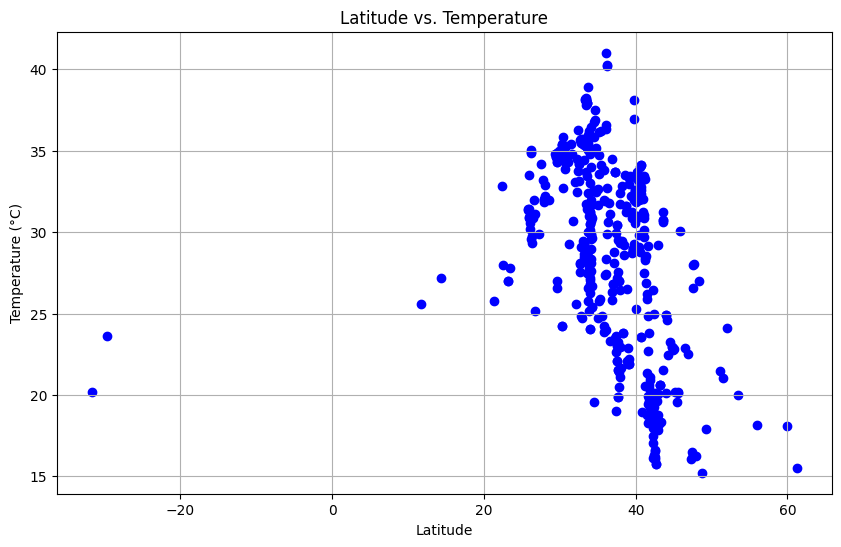

In [80]:
# Create scatter plot (Latitude vs Temparature)
plt.figure(figsize=(10, 6))
plt.scatter(weather_data['lat'], weather_data['temp'], color='blue', marker='o')

# Add titles and labels
plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')

# Show plot
plt.grid(True)
plt.savefig("output_data/solution1.png")
plt.show()



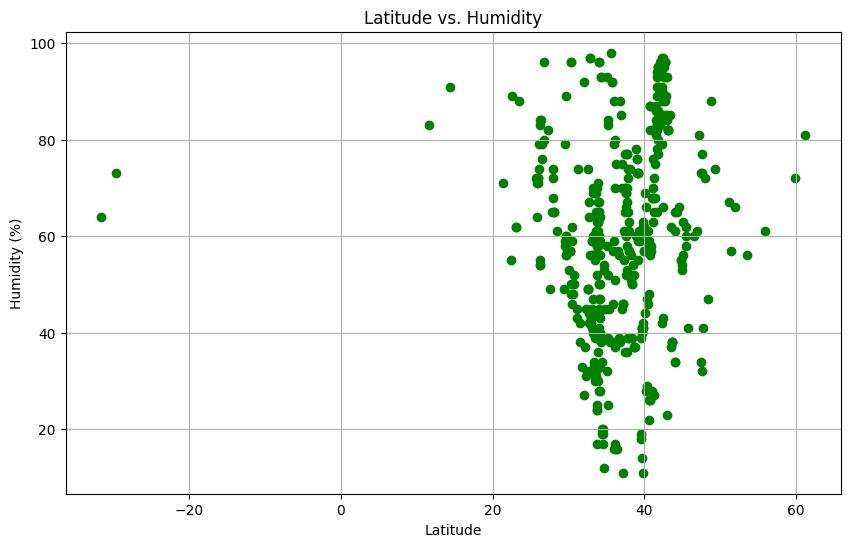

In [81]:
# Create scatter plot ('Latitude vs. Humidity')
plt.figure(figsize=(10, 6))
plt.scatter(weather_data['lat'], weather_data['humidity'], color='green', marker='o')

# Add titles and labels
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig("output_data/solution2.png")
plt.show()

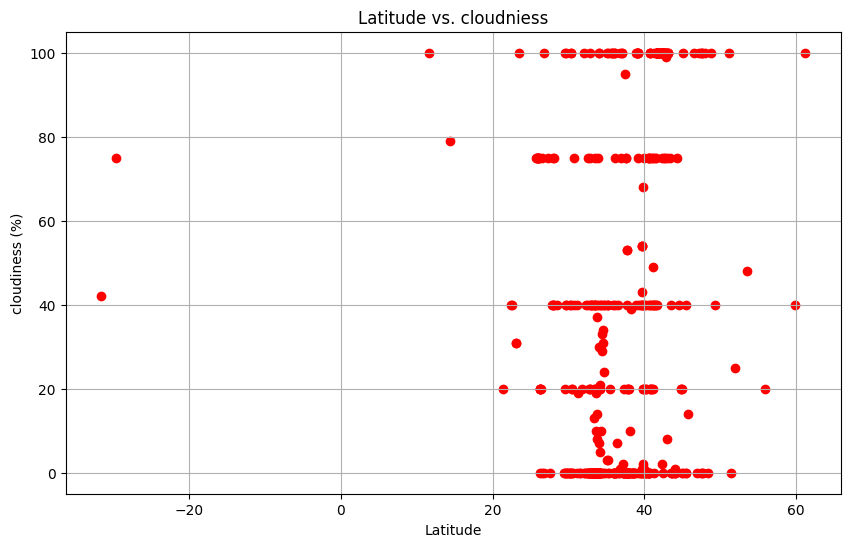

In [82]:
# Create scatter plot ('Latitude vs. cloudiness')
plt.figure(figsize=(10, 6))
plt.scatter(weather_data['lat'], weather_data['cloudiness'], color='red', marker='o')

# Add titles and labels
plt.title('Latitude vs. cloudniess')
plt.xlabel('Latitude')
plt.ylabel('cloudiness (%)')

# Show plot
plt.grid(True)
plt.savefig("output_data/solution3.png")
plt.show()

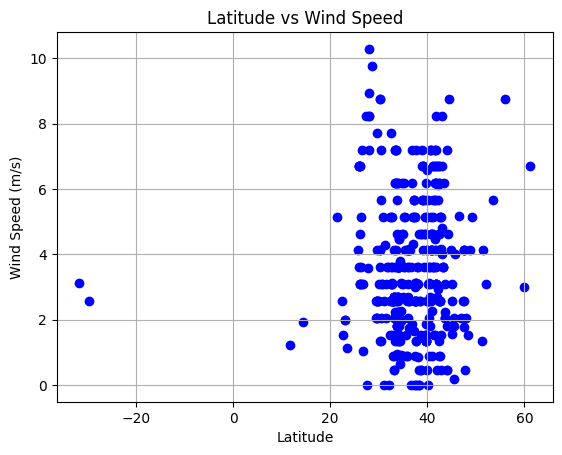

In [83]:
# Create scatter plot ('Latitude vs. wind_speed')
# Extract latitude and wind speed
lat = weather_data['lat']
wind_speed = weather_data['wind_speed']

# Create scatter plot
plt.scatter(lat, wind_speed, color='blue')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Latitude vs Wind Speed')

# Show plot
plt.grid(True)
plt.savefig("output_data/solution4.png")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [84]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [85]:
# Function to create DataFrame with Northern Hemisphere data
def create_northern_hemi_df(df):
    northern_hemi_df = weather_data[weather_data['lat'] >= 0]
    return northern_hemi_df

# Create Northern Hemisphere DataFrame
northern_hemi_df = create_northern_hemi_df(weather_data)

northern_hemi_df


,city,lat,temp,humidity,cloudiness,wind_speed,date,country
city_id,,,,,,,,
0,New York,40.7143,32.06,58,20,4.12,1722965627,US
1,Los Angeles,34.0522,27.59,60,0,2.06,1722966208,US
2,Chicago,41.8500,21.07,80,100,6.17,1722966259,US
3,Houston,29.7633,34.82,57,0,2.57,1722966193,US
4,Phoenix,33.4484,38.12,32,40,6.17,1722966303,US
...,...,...,...,...,...,...,...,...
433,Muncie,40.1934,31.00,66,20,3.09,1722966427,US
434,Temple,31.0982,34.32,45,40,0.00,1722966163,US
435,Kolkata,22.5697,27.97,89,40,1.54,1722966363,IN


In [87]:
# Linear regression on Northern Hemisphere
# #codes are done with different combinations in the following cells 

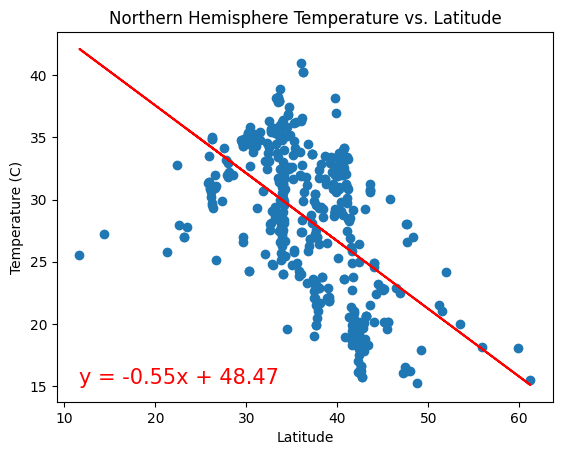

Slope: -0.5451869717308703
Intercept: 48.46568674308415
R-squared: 0.2992397308628034


In [106]:

# Perform linear regression 
# Temparature vs Latitude
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['lat'], northern_hemi_df['temp'])

# Create regression line
regress_values = northern_hemi_df['lat'] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the data
plt.scatter(northern_hemi_df['lat'], northern_hemi_df['temp'])
plt.plot(northern_hemi_df['lat'], regress_values, "r-")
plt.annotate(line_eq, (min(northern_hemi_df['lat']), min(northern_hemi_df['temp'])), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title('Northern Hemisphere Temperature vs. Latitude')
plt.savefig("solution17.png")

plt.show()
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

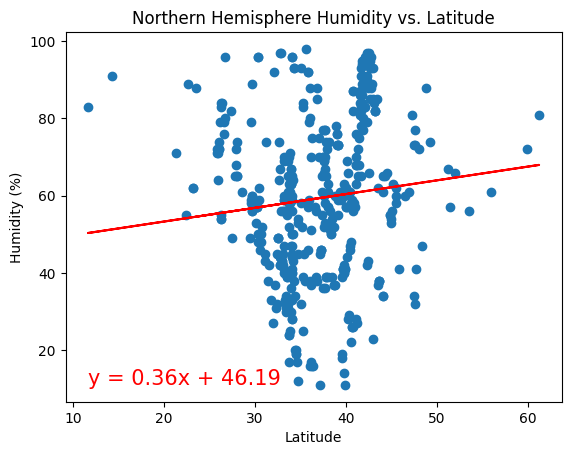

Slope: 0.355672083350426
Intercept: 46.19482114759435
R-squared: 0.010625585444218799


In [89]:
# Northern Hemisphere (linear regression)
#  humidity vs latitude


# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['lat'], northern_hemi_df['humidity'])

# Create regression line
regress_values = northern_hemi_df['lat'] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the data
plt.scatter(northern_hemi_df['lat'], northern_hemi_df['humidity'])
plt.plot(northern_hemi_df['lat'], regress_values, "r-")
plt.annotate(line_eq, (min(northern_hemi_df['lat']), min(northern_hemi_df['humidity'])), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere Humidity vs. Latitude')
plt.savefig("solution16.png")
plt.show()

# Print the regression results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

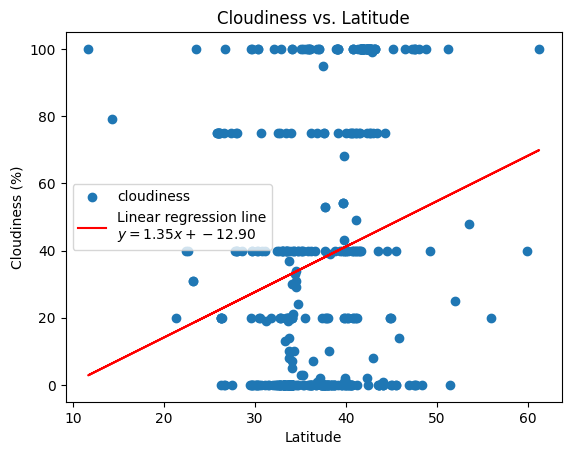

Slope: 1.35
Intercept: -12.90
R-squared: 0.04


In [112]:
# Northern Hemisphere (linear regression)
# cloudiness vs lat

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['lat'], northern_hemi_df['cloudiness'])

# Create regression line
regression_line = slope * northern_hemi_df['lat'] + intercept

# Plot the data
plt.scatter(northern_hemi_df['lat'], northern_hemi_df['cloudiness'], label='cloudiness')
plt.plot(northern_hemi_df['lat'], regression_line, color='red', label=f'Linear regression line\n$y={slope:.2f}x+{intercept:.2f}$')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs. Latitude')
plt.legend()
plt.savefig("solution15.png")
plt.show()

# Print the regression results
print(f'Slope: {slope:.2f}')
print(f'Intercept: {intercept:.2f}')
print(f'R-squared: {r_value**2:.2f}')

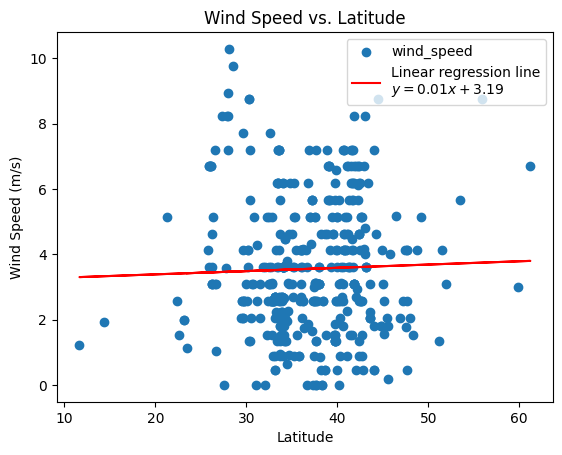

Slope: 0.01
Intercept: 3.19
R-squared: 0.00


In [111]:
# Northern Hemisphere (linear regression)
# wind_speed vs lat
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['lat'], northern_hemi_df['wind_speed'])

# Create regression line
regression_line = slope * northern_hemi_df['lat'] + intercept

# Plot the data
plt.scatter(northern_hemi_df['lat'], northern_hemi_df['wind_speed'], label='wind_speed')
plt.plot(northern_hemi_df['lat'], regression_line, color='red', label=f'Linear regression line\n$y={slope:.2f}x+{intercept:.2f}$')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed vs. Latitude')
plt.legend()
plt.savefig("solution14.png")
plt.show()

# Print the regression results
print(f'Slope: {slope:.2f}')
print(f'Intercept: {intercept:.2f}')
print(f'R-squared: {r_value**2:.2f}')

In [92]:
# Linear regression on Southern Hemisphere
#   the Detailed calculation has been been shown in the following cells .

In [93]:
# the list of cities  (taking 20 random cities under Southern hemisphere)
cities_1= ["São Paulo","Lima,Mexico City","New York","Bogotá","Rio de Janeiro","Santiago","Los Angeles","Buenos Aires","Brasília","Salvador","Toronto","Chicago","Fortaleza","Santo Domingo","Belo Horizonte","Medellín","Cali","Houston","Guayaquil","Santa Maria","Santa Fe"]

In [94]:
lat = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
country =[]
# Loop through the list of cities and perform a request for data on each
try:

    for city in cities_1:
        response = requests.get(query_url + city).json()
        print(city)
        print(response)
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
    
       
        print(f"The latitude information received is: {lat}")
        print(f"The temperature information received is: {temp}")
        print(f"The humidity information received is: {humidity}")
        print(f"The cloudiness information received is: {cloudiness}")
        print(f"The wind_speed information received is: {wind_speed}")
        
except:       
    
    print(f"city not found {city}")
    pass
    # pause to avoid rate limiting
time.sleep(1)

São Paulo
{'coord': {'lon': -46.6361, 'lat': -23.5475}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 27.81, 'feels_like': 27.44, 'temp_min': 27.47, 'temp_max': 28.2, 'pressure': 1014, 'humidity': 39, 'sea_level': 1014, 'grnd_level': 926}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 20}, 'clouds': {'all': 0}, 'dt': 1722965995, 'sys': {'type': 1, 'id': 8394, 'country': 'BR', 'sunrise': 1722937100, 'sunset': 1722977187}, 'timezone': -10800, 'id': 3448439, 'name': 'São Paulo', 'cod': 200}
The latitude information received is: [-23.5475]
The temperature information received is: [27.81]
The humidity information received is: [39]
The cloudiness information received is: [0]
The wind_speed information received is: [4.12]
Lima,Mexico City
{'coord': {'lon': -77.0282, 'lat': -12.0432}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp':

In [95]:
print(response)

{'coord': {'lon': -60.7, 'lat': -31.6333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 20.16, 'feels_like': 19.9, 'temp_min': 20.16, 'temp_max': 20.16, 'pressure': 1008, 'humidity': 64, 'sea_level': 1008, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 3.11, 'deg': 217, 'gust': 3.47}, 'clouds': {'all': 42}, 'dt': 1722966272, 'sys': {'type': 2, 'id': 2079135, 'country': 'AR', 'sunrise': 1722941199, 'sunset': 1722979838}, 'timezone': -10800, 'id': 3836277, 'name': 'Santa Fe', 'cod': 200}


In [96]:
# create a DataFrame from cities, lat, temp, temp,humidity,wind_speed
southern_hemisphere_dict = {
    "city": cities_1,
    "lat": lat,
    "temp": temp,
    "humidity" : humidity,
    "cloudiness" : cloudiness,
    "wind_speed" : wind_speed,
    
}
southern_hemisphere_data = pd.DataFrame(southern_hemisphere_dict)
southern_hemisphere_data

,city,lat,temp,humidity,cloudiness,wind_speed
0,São Paulo,-23.5475,27.81,39,0,4.12
1,"Lima,Mexico City",-12.0432,17.14,72,100,5.14
2,New York,40.7143,32.06,58,20,4.12
3,Bogotá,4.6097,17.73,55,75,6.17
4,Rio de Janeiro,-22.9028,32.01,35,20,3.09
5,Santiago,-33.4569,11.24,59,75,2.06
6,Los Angeles,34.0522,27.59,60,0,2.06
7,Buenos Aires,-34.6132,16.72,95,100,10.73
8,Brasília,-15.7797,24.51,38,75,6.17
9,Salvador,13.8333,29.18,60,51,1.15


In [97]:
#setting the Index Name
southern_hemisphere_data.index = southern_hemisphere_data.index.set_names(['city_id'])
southern_hemisphere_data

,city,lat,temp,humidity,cloudiness,wind_speed
city_id,,,,,,
0,São Paulo,-23.5475,27.81,39,0,4.12
1,"Lima,Mexico City",-12.0432,17.14,72,100,5.14
2,New York,40.7143,32.06,58,20,4.12
3,Bogotá,4.6097,17.73,55,75,6.17
4,Rio de Janeiro,-22.9028,32.01,35,20,3.09
5,Santiago,-33.4569,11.24,59,75,2.06
6,Los Angeles,34.0522,27.59,60,0,2.06
7,Buenos Aires,-34.6132,16.72,95,100,10.73
8,Brasília,-15.7797,24.51,38,75,6.17


In [98]:
# filtering the data with condition
filtered_southern_hemisphere_cities = southern_hemisphere_data[southern_hemisphere_data['lat'] < 0]

# Print the resulting DataFrame
print(filtered_southern_hemisphere_cities)

                     city      lat   temp  humidity  cloudiness  wind_speed
city_id                                                                    
0               São Paulo -23.5475  27.81        39           0        4.12
1        Lima,Mexico City -12.0432  17.14        72         100        5.14
4          Rio de Janeiro -22.9028  32.01        35          20        3.09
5                Santiago -33.4569  11.24        59          75        2.06
7            Buenos Aires -34.6132  16.72        95         100       10.73
8                Brasília -15.7797  24.51        38          75        6.17
12              Fortaleza  -3.7227  31.07        48           0        6.69
14         Belo Horizonte -19.9208  26.71        31          40        3.60
18              Guayaquil  -2.1667  28.98        61          75        3.09
19            Santa Maria -29.6842  23.61        73          75        2.57
20               Santa Fe -31.6333  20.16        64          42        3.11


Slope: 0.3367159582098828
Intercept: 30.65695887694364
R-squared: 0.33718980381107583


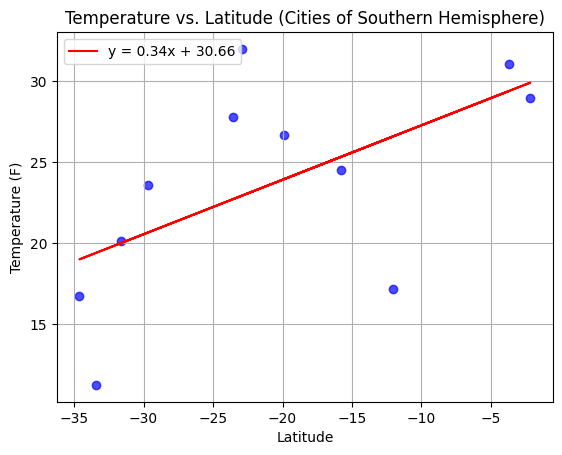

In [107]:
#Southern Hemisphere (linear regression)- Latitude Vs Teparature
# Create a scatter plot
plt.scatter(filtered_southern_hemisphere_cities['lat'], filtered_southern_hemisphere_cities['temp'], marker='o', color='b', alpha=0.7)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature vs. Latitude (Cities of Southern Hemisphere)')

# Compute linear regression
slope, intercept, r_value, p_value, std_err = linregress(filtered_southern_hemisphere_cities['lat'], filtered_southern_hemisphere_cities['temp'])
regression_line = slope * filtered_southern_hemisphere_cities['lat'] + intercept
plt.plot(filtered_southern_hemisphere_cities['lat'], regression_line, color='r', label=f'y = {slope:.2f}x + {intercept:.2f}')
plt.legend()
plt.grid(True)

# Print regression results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

# Save the figure (you can customize the filename and format)
plt.savefig("solution7.png")

plt.show()

Slope: -0.5683549930894264
Intercept: 44.052637398252386
R-squared: 0.10754430080710599


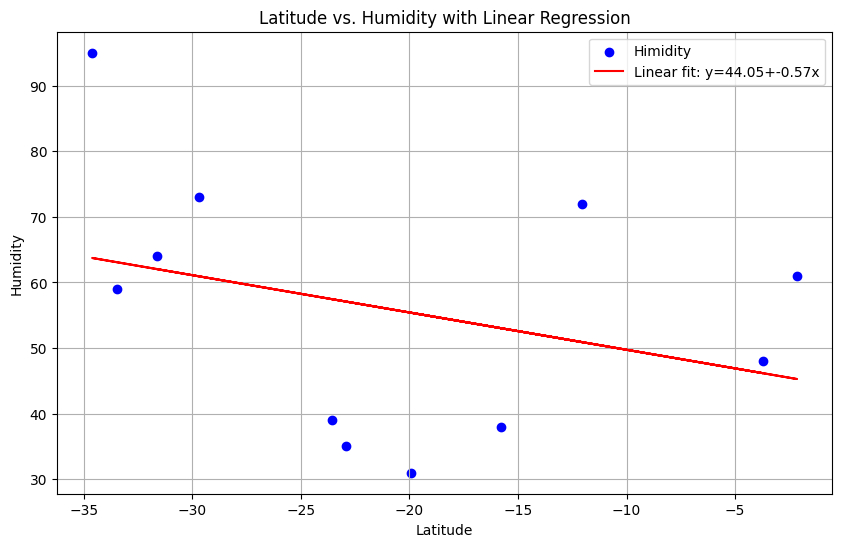

In [110]:
#Southern Hemisphere (linear regression)- Latitude Vs Humidity
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(filtered_southern_hemisphere_cities['lat'], filtered_southern_hemisphere_cities['humidity'])

# Print regression results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

# Create scatter plot with regression line using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(filtered_southern_hemisphere_cities['lat'], filtered_southern_hemisphere_cities['humidity'], color='blue', label='Himidity')
plt.plot(filtered_southern_hemisphere_cities['lat'], intercept + slope * filtered_southern_hemisphere_cities['lat'], 'r', label=f'Linear fit: y={intercept:.2f}+{slope:.2f}x')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity with Linear Regression')
plt.legend()
plt.grid(True)
plt.savefig("solution11.png")
plt.show()
from scipy.stats import linregress


Slope: -0.593803043669638
Intercept: 42.33994743328041
R-squared: 0.03443667769906626


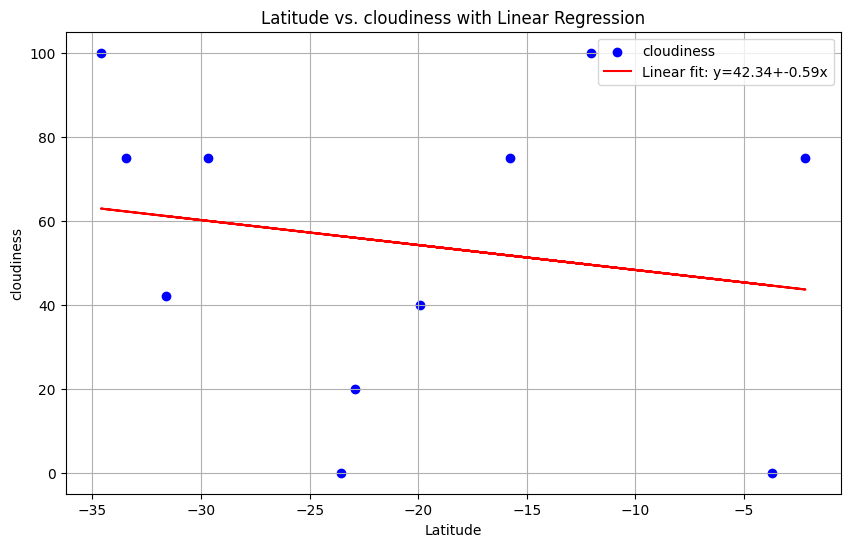

In [109]:

#Southern Hemisphere (linear regression)- Latitude Vs Cloudiness 
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(filtered_southern_hemisphere_cities['lat'], filtered_southern_hemisphere_cities['cloudiness'])

# Print regression results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

# Create scatter plot with regression line using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(filtered_southern_hemisphere_cities['lat'], filtered_southern_hemisphere_cities['cloudiness'], color='blue', label='cloudiness')
plt.plot(filtered_southern_hemisphere_cities['lat'], intercept + slope * filtered_southern_hemisphere_cities['lat'], 'r', label=f'Linear fit: y={intercept:.2f}+{slope:.2f}x')
plt.xlabel('Latitude')
plt.ylabel('cloudiness')
plt.title('Latitude vs. cloudiness with Linear Regression')
plt.legend()
plt.grid(True)
plt.savefig("solution12.png")
plt.show()
from scipy.stats import linregress

Slope: 0.004164461854022906
Intercept: 4.665965747827681
R-squared: 0.33718980381107583


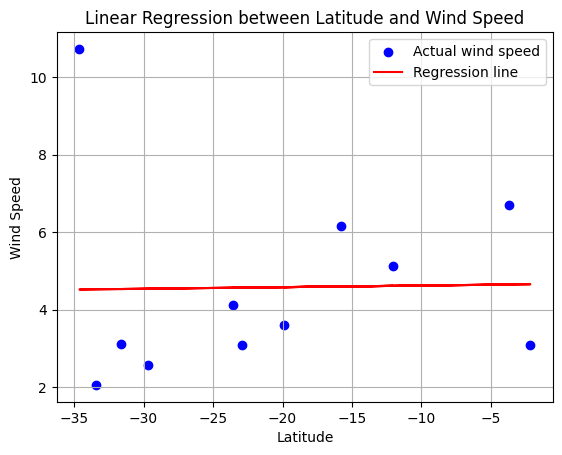

In [108]:
#Southern Hemisphere (linear regression)- Latitude Vs Wind_speed

# Define the independent variable (X) and the dependent variable (y)
X = filtered_southern_hemisphere_cities['lat']
y = filtered_southern_hemisphere_cities['wind_speed']

# Calculate the means of X and y
X_mean = np.mean(X)
y_mean = np.mean(y)

# Calculate the terms needed for the numerator and denominator of the slope
numerator = np.sum((X - X_mean) * (y - y_mean))
denominator = np.sum((X - X_mean) ** 2)

# Calculate the slope (m) and intercept (b)
slope = numerator / denominator
intercept = y_mean - (slope * X_mean)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

# Predict wind_speed based on the model
#filtered_southern_hemisphere_cities['predicted_wind_speed'] = slope * X + intercept
filtered_southern_hemisphere_cities.loc[:, 'predicted_wind_speed'] = slope * X + intercept

# Plot the data and the regression line
plt.scatter(filtered_southern_hemisphere_cities['lat'], filtered_southern_hemisphere_cities['wind_speed'], color='blue', label='Actual wind speed')
plt.plot(filtered_southern_hemisphere_cities['lat'], filtered_southern_hemisphere_cities['predicted_wind_speed'], color='red', label='Regression line')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression between Latitude and Wind Speed')
plt.legend()
plt.grid(True)
plt.savefig("solution13.png")

plt.show()